# Formala 1 - Data analysis

## Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen

## Get drivers of the latest race

In [17]:
response = urlopen('https://api.openf1.org/v1/drivers?&session_key=latest')
data = json.loads(response.read().decode('utf-8'))

drivers = pd.DataFrame(data)
drivers

,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,driver_number,team_colour,team_name,name_acronym
0,9662,1252,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,1,3671C6,Red Bull Racing,VER
1,9662,1252,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,4,FF8000,McLaren,NOR
2,9662,1252,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,10,0093cc,Alpine,GAS
3,9662,1252,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,11,3671C6,Red Bull Racing,PER
4,9662,1252,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,14,229971,Aston Martin,ALO
5,9662,1252,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,16,E80020,Ferrari,LEC
6,9662,1252,L STROLL,CAN,Lance,Lance STROLL,https://media.formula1.com/d_driver_fallback_i...,Stroll,18,229971,Aston Martin,STR
7,9662,1252,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,20,B6BABD,Haas F1 Team,MAG
8,9662,1252,Y TSUNODA,JPN,Yuki,Yuki TSUNODA,https://media.formula1.com/d_driver_fallback_i...,Tsunoda,22,6692FF,RB,TSU
9,9662,1252,A ALBON,THA,Alexander,Alexander ALBON,https://media.formula1.com/d_driver_fallback_i...,Albon,23,64C4FF,Williams,ALB


## Display the speed according to the gear

In [35]:
response = urlopen('https://api.openf1.org/v1/car_data?driver_number=44&session_key=latest&speed>=1')
data = json.loads(response.read().decode('utf-8'))

gear_speed = pd.DataFrame(data).query('n_gear > 0')
gear_speed

,meeting_key,session_key,driver_number,date,rpm,speed,n_gear,throttle,drs,brake
2,1252,9662,44,2024-12-08T12:20:16.741000+00:00,3796,3,1,0,1,0
3,1252,9662,44,2024-12-08T12:20:17.221000+00:00,3808,7,1,0,1,0
4,1252,9662,44,2024-12-08T12:20:17.422000+00:00,3933,10,1,0,1,0
5,1252,9662,44,2024-12-08T12:20:17.622000+00:00,4490,11,1,0,1,0
6,1252,9662,44,2024-12-08T12:20:17.942000+00:00,4505,13,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
23100,1252,9662,44,2024-12-08T14:34:44.607000+00:00,4306,15,1,0,0,100
23101,1252,9662,44,2024-12-08T14:34:44.967000+00:00,3667,12,1,0,0,100
23102,1252,9662,44,2024-12-08T14:34:45.207000+00:00,3716,10,1,0,0,100
23103,1252,9662,44,2024-12-08T14:34:45.527000+00:00,3886,7,1,0,0,100


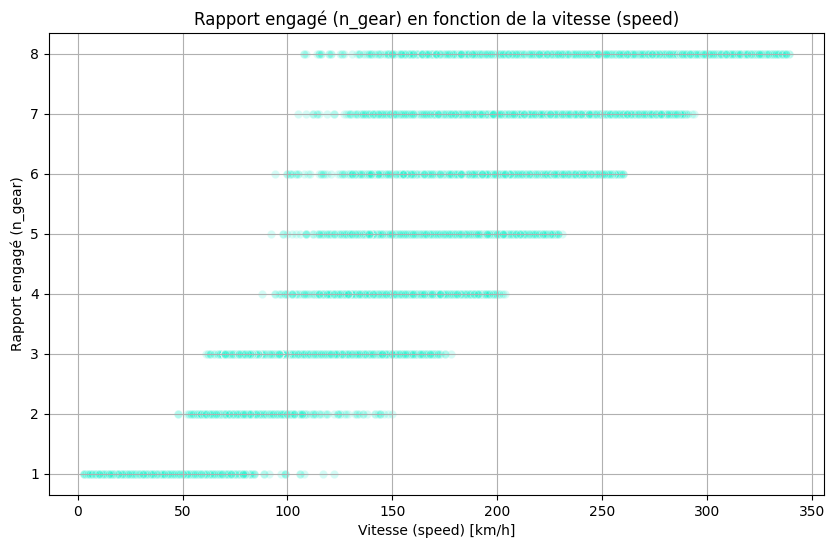

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(gear_speed['speed'], gear_speed['n_gear'], c='#27F4D2', alpha=0.2, edgecolors='w')
plt.title('Rapport engagé (n_gear) en fonction de la vitesse (speed)')
plt.xlabel('Vitesse (speed) [km/h]')
plt.ylabel('Rapport engagé (n_gear)')
plt.grid(True)
plt.show()